지금까지 ML model을 다뤘다 그리고 학습 알고리즘은 black box와 같이 알수없다.
자세히 알 필요도 없다. 

하지만 이해하기위해선 어떻게 작동하는지 알아야한다. 맞는 알고리즘을 쓰고있는지, 좋은 hyperparameter를 선택했는지 등..  또 디버깅해야하기 떄문에

이번챕터에서 이해하고, building하고 training neural networks에서 알아보깅

이번챕터에서 Linear Regression model을 볼 것이다. 
2가지 트레이닝 방법은 

1. 직접적으로 모델 파라미터를 조정해서 best fit을 찾는다. "closed-form"
2. 반복적인 정규화를 사용한다. Gradient Descent (GD)라고 불림. 이후에 batch GD, Mini batch GD, Stochastic GD를 배울것이다. 

다음은 Polynomial Regression을 볼것인데 매우 복잡한 nonlinear datasets에 잘맞는다.
linear Regression보다 많은 파라미터를 가지고 있는 것들은 overfitting을 하는 경우가 있다.
따라서 overfitting을 감소하기위해 정규화 방법이 있다.

마지막으로 Logistic Regression 이랑 Softmax Regression을 본다.

# Linear Regression

![01](../book_images/04/01.png)

**y^** 은 예측값을 의미하고 **n** 은 feature의 개수를 의미하고 **Xi** 는 i번째 feature값을 의미하고 
**θj** 는 j번째 모델 파라미터를 의미하고 **θ0** 은 bias를 의미함.

위의 식을 벡터화시켜서 훨신 간결하게 쓸수있다.

![02](../book_images/04/02.png)

이것이 Linear Regression model이다. 먼저 model fit이 잘맞는지 측정한다. 챕터2에서 흔히 쓰이는 MSE에 대해서 설명했다. MSE가 최소가 되는 θ값을 찾는다. 

![03](../book_images/04/03.png)

2장과 다른점은 **벡터 θ**로 매개변수화 된것밖에없다.

## The Normal Equation

cost function이 최소가되는 θ를 찾았다면 이것은 closed-form solution이다. 왜냐면 모델 파라미터를 조정해서 찾았기 때문에 ..
다른 말로 Normal Equation이라함. 

![04](../book_images/04/04.png)

**θ^** 은 θ의 cost function 최소값을 의미한다.


In [24]:
import numpy as np

X = 2 * np.random.rand(100,1)
print(X)
Y = 4+3* X + np.random.randn(100,1)
print(Y)

[[ 0.04363797]
 [ 0.23005929]
 [ 1.29579866]
 [ 0.94864085]
 [ 1.09694819]
 [ 1.99029968]
 [ 0.76765515]
 [ 0.98053665]
 [ 0.80785157]
 [ 1.00799884]
 [ 1.89216585]
 [ 1.32224572]
 [ 1.16958409]
 [ 1.01522055]
 [ 0.27663899]
 [ 0.67621583]
 [ 1.51534628]
 [ 1.20441408]
 [ 0.86167829]
 [ 0.47653739]
 [ 0.87845852]
 [ 0.51208691]
 [ 0.54368678]
 [ 0.45387043]
 [ 1.9422303 ]
 [ 0.09651551]
 [ 0.73482972]
 [ 0.36937945]
 [ 1.38171744]
 [ 0.83265082]
 [ 0.60622759]
 [ 0.35788015]
 [ 1.04621382]
 [ 1.59580443]
 [ 1.88994254]
 [ 0.49044513]
 [ 1.55835822]
 [ 0.29934151]
 [ 1.54874593]
 [ 0.919574  ]
 [ 1.67464706]
 [ 1.2158125 ]
 [ 1.49870305]
 [ 1.12212134]
 [ 0.15398817]
 [ 0.55805619]
 [ 1.23479584]
 [ 0.65285895]
 [ 1.07318305]
 [ 1.73298753]
 [ 0.70776082]
 [ 1.38938684]
 [ 1.52699504]
 [ 0.58215354]
 [ 0.75676545]
 [ 1.01239858]
 [ 0.36316316]
 [ 1.3615446 ]
 [ 1.62722203]
 [ 1.28547786]
 [ 1.55947801]
 [ 0.67127111]
 [ 1.48268537]
 [ 0.06820817]
 [ 0.07215752]
 [ 1.08260775]
 [ 1.01821

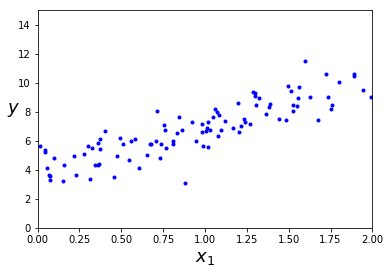

In [25]:
import matplotlib.pyplot as plt

plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

y = 4 + 3x1

In [27]:
theta_best

array([[ 3.84963293],
       [ 3.13439857]])

θ0 = 4.124 θ1 = 2.85

츙분히 비슷하게 얻었다 하지만 noise때문에 정확한 매개변수 얻을수없음.

In [28]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  3.84963293],
       [ 10.11843008]])

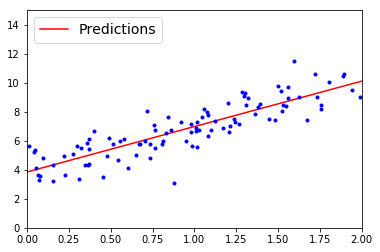

In [29]:
plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X,Y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

같은 방법으로 Scikit-Learn을 이용해보자

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.84963293]), array([[ 3.13439857]]))

In [31]:
lin_reg.predict(X_new)

array([[  3.84963293],
       [ 10.11843008]])

## Computational Complexity

![05](../book_images/04/05.png)

Normal Equation은 n X n 행렬인 XT * X의 역행렬을 계산한다. 이때 n 은 features수 이다. 이런 계산의 복잡성은 O(n^2.4) to O(n^3) (구현에 따라 다름) 이다. feature수를 두배로하면 2^2.4 = 5.3 to 2^3 = 8

이 방정식은 선형이기 때문에 대규모 훈련을 시킬때 좋음. 또한 Linear Regression 모델 (using Normal Equation 또는 다른 알고리즘) 을 학습하면 예측이 매우 빠르다. 



# Gradient Descent

Gradient Descent는 일반적인 정규화 알고리즘이다. 이것은 파라미터를 조정하면서 cost function을 최소화 시킨다. 

θ를 랜덤으로 정해놓고 (random initialization이라 불림) 쪼금식 진행하는데 cost function을 감소시켜 최소로 수렴할때 까지 .

![06](../book_images/04/06.png)

얼마나 크게 감소할껀지 정하는 파라미터는 learning rate이다. 만약 learning rate가 너무 작다면 내려가는데 너무 오래걸릴것이다. 밑의 그림처럼

![07](../book_images/04/07.png)

반대로 learning rate가 너무크다면 너무 많이 왔다갓다거려서 최소값을 찾기 어려울 것이다. 

![08](../book_images/04/08.png)

마지막으로 최소값이 여러개 hole이 여러개 있을때는 진짜 최소값을 찾기 어려울것이다. 

![09](../book_images/04/09.png)

왼쪽부터 시작하게 되면 local minimum에 도달할것이고 오른쪽에서 시작하면 global minimum에 도달할때까지 시간이 너무 오래걸릴 것이다.

다행히 Linear Regression일경우 convex function이기 떄문에 두점을 연결하는 선을 하나그려볼때 그 선과 함수와 만나지 않으면 하나의 global minimum인 local minimum이 없다는 것을 의미한다. 

![10](../book_images/04/10.png)

왼쪽은 feature 1, 2 가 비슷한 크기를 가질때를 보여주고 오른쪽은 둘중 하나가 크고 하나가 작은 크기를 가질때 보여준다. 
왼쪽은 최소값을 향해 곧게 이동하지만 오른쪽은 최소값과 직각을 이루면서 감소하다가 올바르게 감소하는 것을 볼수 있는데 이는 시간이 오래걸릴것이라고 예측할 수 있다.

이 다이어그램은 모델을 훈련하는 것이 cost function을 최소화하는 모델의 매개변수 조합을 찾아야 한다는 것을 의미한다. 매개변수가 많아질수록 크기가 커지고 검색이 어려워진다. 

## Batch Gradient Descent

Gradient Descent를 구현하려면 각 모델 매개 변수 θj에 대한 cost function의 gradient를 계산해야한다. θj를 조금만 변경하면 얼마나 달라질지 계산해야한다. 

![11](../book_images/04/11.png)

식 4-5는 매개변수 θj와 관련해 편미분을 계산한다.

![12](../book_images/04/12.png)

gradient vector가 uphill을 향하면 반대로 downhill으로 가야한다. 이것은 θ에서 ∇ θMSE (θ)를 뺀 것을 의미한다.
내리막의 크기를 결정하기 위해 η를 곱한다.

![13](../book_images/04/13.png)

In [32]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients
    
theta

array([[ 3.84963293],
       [ 3.13439857]])

gradient descent가 제대로 작동했다. 다른 learning rate를 사용하면 어떻게 될까보자

![14](../book_images/04/14.png)



왼쪽은 learning rate가 너무낮게 나왔다. 계속 하다보면 결국 도달하겠지만 시간이 오래걸린다. 
중간은 잘 나왔다.
오른쪽은 learning rate가 너무 높게 나왔다.

좋은 학습률을 찾으려면 grid search를 이용해라 (챕터2장) 시간이 너무 오래걸리는 모델을 제거하기위해 반복 횟수를 제한한다. gradient vector가 작아질때 인터럽트한다. 

## Stochastic Gradient Descent

Batch Gradient Descnet의 문제는 모든 단계에서 gradient를 계산하기때문에 시간이 너무 오래걸린다. Stochastic Gradient Descent 는 무작위의 인스턴스를 선택하고 해당 인스턴스만 gradient를 계산한다. 무작위 성질을 가지고있어서 Batch Gradient Descent보다 훨씬 덜 규칙적이다. 최소값에 도달 할 때까지 완만하게 감소하는 대신 cost function이 평균적으로만 줄어들다가 오르내린다. 시간이 지남에 따라 최소값에 근접하게 될 것이지만 완벽한 최소값은 아니다.

![15](../book_images/04/15.png)

cost function 이 불규칙하면 위의 그림과 같이 local minimum에서 벗어나게 해줌. 따라서 global 최소값을 찾는데 batch보다 성능이 뛰어나다.

local을 벗어나는 것은 좋지만 결코 최소로 정착할 수 없다는 것은 좋지 않다. 이 해결책은 점진적으로 learning rate를 낮추는 것이다. 크게 시작되어서 작게 진행되게 만들면 안정화가 된다. 

다음코드는 Stochastic Gradient Descent를 보여준다.

In [34]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = Y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[ 3.79923658],
       [ 3.14725646]])

Batch Gradient Descent코드가 전체 train set을 통해 1000회 반복되는 동안 train set을 50회 통과하고 좋은 곳에 도달함.

![16](../book_images/04/16.png)

인스턴스는 무작위로 선택되므로 일부 인스턴스는 여러번 선택될수 있지만 일부 인스턴스는 선택되지 않을 수 있다. 모든 인스턴스가 통과하는지 확인하려면 train set을 섞어서 인스턴스 별로 인스턴스화 한다음 다시 섞는 것이다. 

Scikit-Learn을 사용하여 SGD를 이용하려면 SGDRegressor 클래스 사용하면된다.

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, Y.ravel())

sgd_reg.intercept_,sgd_reg.coef_

/Users/jaejin/dev/tensorflow/jupyter/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([ 3.82030599]), array([ 3.09960433]))

## Mini-batch Gradient Descnet

각 단계에서 전체 train set 또는 하나의 인스턴스를 기반으로 한 gradient를 계산하는 대신 mini-batch GD는 미니 일괄 처리라고 불리는 인스턴스의 작은 무작위 집합에서 gradient를 계산한다. 특히 GPU사용할때 좋음 

mini-batch GD는 SGD보다 조금 더 가깝게 끝난다. 반면에 local 을 벗어나는 것이 힘들어 질 수도있다. 밑의 그림은 3개의 Gradient Descent 알고리즘에 의해 취해진 경로를 보여준다. Batch GD는 최소한으로 가는 반면 다른것들은 주위를 멤돈다.

![17](../book_images/04/17.png)

다음은 지금까지 설명한 알고리즘을 비교해보자. m 은 인스턴스 수 n은 feature 수 이다.

|Algorithm| Latge m | Out-of-core support | Large n | Hyperparams |
|---|---|---|---|---|
|Normal Equation | Fast | No | Slow | 0 |
|Batch GD | Slow | No | Fast | 2 |
| Stochastic | Fast | Yes | Fast | >=2 |
|Mini-batch GD | Fast | Yes | Fast | >=2 |



# Plynomial Regression

데이터가 선형이 아닌 비선형일때 선형모델을 사용할수 있다. 
각 feature의 기능을 새로운 feature로 추가 한다음 확장 된 feature 세트에서 선형 모델을 train 시킨다.

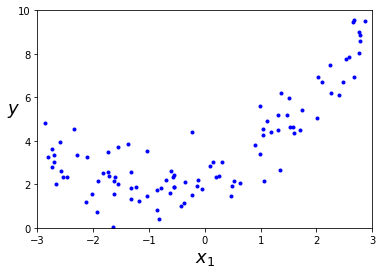

In [39]:
m = 100
X = 6* np.random.rand(m,1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

import matplotlib.pyplot as plt

plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

위의 그림은 선형모델을 이용하기엔 적합하지 않다
Scikit-Learn의 PolynomialFeatures 클래스를 사용한다.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

X_poly[0]

array([-1.92151   ,  3.69220069])

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.3008086]), array([[ 0.9381077 ,  0.48375674]]))

In [ ]:
# 예측한 그래프 그리기

다중 feature가 있을때 다항식 회귀는 feature간 관계를 찾을 수 있다. 선형으로는 불가능함. 
a,b가 있을때 ab, a^2b등등 

## Learning Curves

높은 차수의 다항식 회귀 분석을 수행하면 선형 회귀 보다는 훨씬 잘 맞을 것이다.

![18](../book_images/04/18.png)

높은 차수의 다항식 회귀 모델은 overfitting이 될 수도 있다. 가장 일반화가 될 모델은 2차 모델이다. 2장에서 CV를 통해서 validation set을 만들어 테스트 해볼수 있다. 다른 방법은 learning curves를 확인 하는 방법이다. 

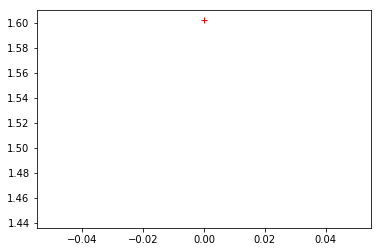

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,Y)

![19](../book_images/04/19.png)


train set에 인스턴스가 하나 또는 두개일경우 모델이 완벽히 맞출수 있어 곡선이 0에서 시작된다. 
하지만 새로운 인스턴스가 trainset 에 추가 되면 선형이 아니기 때문에 traindata를 맞출수 없다. 따라서 안좋게 나타난다.
이제 test 데이터 성능을 보면 극 소수의 인스턴스에서 train을 받으면 제대로 일반화 할 수 없기 때문에 초기에 유효서 검증 오류가 아주 큰 이유가 된다 

이러한 곡선은 underfittin 모델을 보여준다.

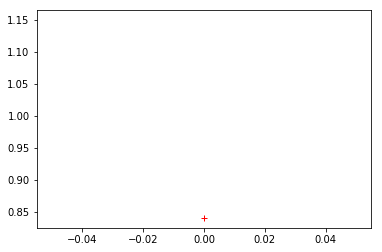

In [51]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10,
                                                                      include_bias=False)),
                                 ("lin_reg", LinearRegression()),
                                 ])

plot_learning_curves(polynomial_regression, X,Y)

train data error는 선형 회귀 모델보다 훨씬 낮다. 
곡선 사이에간격이 있는데 overfitting모델의 특징인 유효성 검사 데이터 보다 train 데이터 에서 훨씬 잘 수행됨을 의미한다. 

![20](../book_images/04/20.png)



# Regularized Linear Models

1장 2장에서 보았듯이 overfitting을 줄이는 방법은 정규화 하는 것이다. 간단한 방법은 다항식의 차수를 줄이는 법이다. 

## Ridge Regression

cost function에 정규화 항을 더한다. 데이터에 적합해질 뿐만아니라 가중치를 가능한 작게 유지하게 된다. 
하이퍼 파라미터 α는 모델을 정규화하는 양을 정한다. α = 0 이면 ridge regression은 단지 선형이다. α이 매우 큰경우 모든 가중치는 거의 0에 가까워지고 그 결과는 데이터의평균을 통과하는 선이 된다.

![21](../book_images/04/21.png)

 L2 norm이라 부름
 
밑의 그림은 서로 다른 α값을 사용하여 일부 선형 데이터에 대한 학습 한 여러 ridge 모델을 보여준다.


In [52]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,Y)
ridge_reg.predict([[1.5]])

array([[ 5.17253409]])

In [57]:
sgd_reg = SGDRegressor(penalty="12")
sgd_reg.fit(X, Y.ravel())
sgd_reg.predict([[1.5]])

ValueError: Penalty 12 is not supported. 

## Lasso Regression

선형 회귀의 또 다른 정규화 버전이다. Ridge와 마찬가지로 cost function에 정규화를 추가하지만 가중치 벡터의 L1 norm을 사용한다.

![22](../book_images/04/22.png)
![23](../book_images/04/23.png)

Lasso 의 중요한 특징은 가장 중요하지 않은 특징의 가중치를 완저히 없앤다. ( 0으로 만들어버림 )

밑의 그림을 보면 알수있다. 왼쪽 위의 그림에서 타원은 비 정규화 된 MSE cost function을 나타내고 흰색원은 하강 경로 다이아몬드는 L1 패널티를 나타낸다.  θ1 = 0에 도달 한다음  θ2 = 0에 도달 할 때까지 아래로 간다. 
오른쪽 위의 그림은 동일한 cost functioin과 α = 0.5의 L1 패널티를 나타낸다. 

![24](../book_images/04/24.png)



In [58]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,Y)
lasso_reg.predict([[1.5]])

array([ 5.12405804])

## Elastic Net

Elastic Net은 Ridge Regression과 Lasso Regression 사이의 중간 지점이다. 섞은 것으로 혼합 비율 r을 제어 할 수있다. r = 0 인경우 Ridge Regression과 같고 r = 1일때 Lasso Regression과 같다.

![25](../book_images/04/25.png)

Ridge가 좋은 기본값이지만 실제로 몇 가지 기능만 유용하다고 보면 Lasso나 Elastic Net을 선호한다.

In [59]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,Y)
elastic_net.predict([[1.5]])


array([ 5.12619305])

## Early Stopping

Validation error가 최소가 될때 학습을 중지시켜버린다. 

![26](../book_images/04/26.png)



In [61]:
from sklearn.base import clone

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90,
                                                           include_bias=False)),
                      ("std_scaler", StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start = True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'StandardScaler' is not defined

# Logistic Regression

1장에서 봤듯이 회귀 알고리즘을 분류에도 사용할수있듬. 인스턴스가 특정 클래스에 속할 확률을 추정하는데 일반적으로 사용된다. 추정확률이 50%보다 크면 1 아니면 0이라고 라벨링을 하면됨.

## Estimating Probabilities

직선 회귀 모델과 마찬가지로 가중치를 계산하지만 직접 결과를 출력하는대신 logistic한 결과를 냄

![27](../book_images/04/27.png)

0과 1사이의 수를 출력하는 시그모이드 함수이다.

![28](../book_images/04/28.png)

인스턴스 x가 양의 클래스에 속하는 확률을 추정하면 예측을 쉽게 할 수 있음.

![29](../book_images/04/29.png)

## Training and Cost Function

학습 시킬때 양의 인스턴스 (y=1)에 대한 높은 확률과 음의 인스턴스 (y=0)에 대한 낮은 확률을 추정하도록 매개변수 벡터 θ 를 설정한다.

![30](../book_images/04/30.png)

이 cost function은 t가 0에 가까울때 log(t)가 커진다. 따라서 모델이 양의 인스턴스에 대해 확률이 0에 가까우면 cost가 커지고 모델이 추정하면 매우 커질것이다. 반면 t 가 1에 가까울때 log(t)는 0에 가깝기 때문에 추정된 확률이 음의 인스턴스의 경우 1에 가까울수록 cost는 0에 가깝다.

![31](../book_images/04/31.png)

안좋은 것은 cost function을 최소화하는 θ의 값을 계산할 수 있는 공식이없다. 
좋은 것은 cost function이 볼록형이므로 gradient descent가 최소값을 찾도록한다.

![32](../book_images/04/32.png)

이 방정식은 그 전에 방정식과 비슷하게 보인다. 각인스턴스에 대해 에측 오류를 계산하고 j번째 feature값으로 곱한다음 모든 train 인스턴스에 대한 평균을 계산한다.

## Decision Boundaries

꽃의 데이터 셋트를 예로 든다.

![33](../book_images/04/33.png)



In [62]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['DESCR', 'target_names', 'feature_names', 'data', 'target']

In [64]:
X = iris["data"][:,3:]
Y = (iris["target"] == 2).astype(np.int)

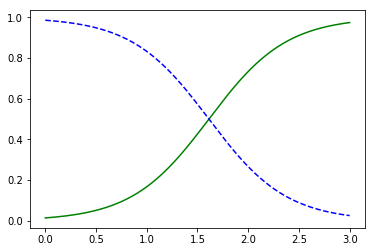

In [65]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,Y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
Y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, Y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, Y_proba[:,0], "b--", label="Not Iris-Virginica")

버지니아 꽃의 꽃잎 폭은 1.4 cm ~ 2.5cm인데 다른 꽃은 일반적으로 0.1cm~1.8cm이다 쪼금 겹친다. 분류기는 2cm이상에서 꽃이 버지니아라고 예측할 것이다. 1.6cm인 경우에도 확률적으로 높은것을 예측한다.


In [66]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

밑의 그림은 데이터 세트를 보여준다.

![34](../book_images/04/34.png)



## Softmax Regression

softmax함수를 적용해 각 클래스의 확률을 계산한다.

각 클래스에는 고유한 매개 변수 벡터 θ (k)가 존재한다. 인스턴스 x에 대한 모든 클래스의 점수를 계산하면 softmax 함수를 통해 클래스 k 가 속하는 확률 을 추정할 수있다.

![35](../book_images/04/35.png)

softmax도 logistic regression과 마찬가지로 높은 확률을 가진것을 예측한다.

cross entropy는 예상 클래스 확률 집합이 목표 클래스와 얼마나 잘 일치하는지 측정하는 데 사용한다.

두 클래스 (K=2)가 있을때는 cost function은 logistic 과 같다.

In [67]:
X = iris["data"][:,(2,3)]
Y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver = "lbfgs", C=10)
softmax_reg.fit(X,Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
softmax_reg.predict([[5,2]])

array([2])

In [69]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

밑의 그림은 색상으로 경계를 보여준다. 